In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, GlobalAvgPool2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.activations import elu, relu
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split
import glob
import os

 
file_pattern = '/data/embedding/total/*.npy'  

file_paths = glob.glob(file_pattern)
 

features = []
eccentricities=[]
for file_path in file_paths:
    # Extract eccentricity parameter from the file name
    eccentricity_str = os.path.basename(file_path).split('_')[4]
    eccentricity = float(eccentricity_str)
     

    print(file_path)
    print(eccentricity)
    # Load the feature vector
    feature_vector = np.load(file_path)
    
     
    features.append(feature_vector)
    eccentricities.append(eccentricity)

# Convert lists to numpy arrays
features = np.asarray(features)
eccentricities = np.asarray(eccentricities)

 
X = (features - features.min()) / (features.max() - features.min())
 
X_train, X_test, y_train, y_test = train_test_split(X, eccentricities, test_size=0.2, random_state=42,)

 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 






 

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import elu, relu

a1 = relu

# Create a dense neural network model
model = Sequential([
    Dense(512, activation=None, input_shape=(2048,)),
    BatchNormalization(),
    Activation(activation=a1),
    Dropout(0.4),

    Dense(256, activation=None),
    BatchNormalization(),
    Activation(activation=a1),
    Dropout(0.4),

    Dense(128, activation=None),
    BatchNormalization(),
    Activation(activation=a1),
    Dropout(0.4),

    Dense(64, activation=None),
    BatchNormalization(),
    Activation(activation=a1),
    #Dropout(0.4),

    Dense(1)
])

 
learning_rate = 0.00005

 
optimizer = Adam(learning_rate=learning_rate)

 
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

 

In [5]:
# save model weights
checkpoint_filepath = './version1_paan20k.weights.h5'

# save only best model during traning 
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

 
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1 ,shuffle=True, callbacks=[model_checkpoint_callback])#)validation_data=(X_test, y_test))

model.load_weights(checkpoint_filepath)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/200


2024-09-27 17:35:50.193512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


499/499 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - loss: 1.0870 - mse: 1.0870 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 2/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.3305 - mse: 0.3305 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 3/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.1865 - mse: 0.1865 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 4/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.1372 - mse: 0.1372 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 5/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.1093 - mse: 0.1093 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 6/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 0.0871 - mse: 0.0871 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 7/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 9/200
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s

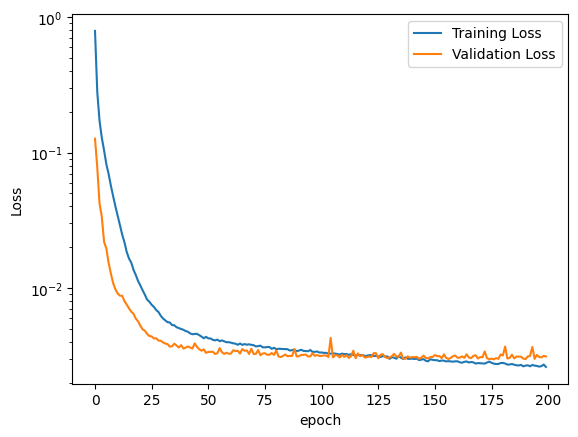

In [6]:
# plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.savefig('loss_curve_version1.pdf', format='pdf', dpi=300, bbox_inches='tight')
 
 

plt.show()

In [7]:
checkpoint_filepath = 'version1_paan5k.weights.h5'
# Load the saved model weights
model.load_weights(checkpoint_filepath)
y_pred = model.predict( X_test)

/Users/gwem/miniconda3/envs/ml_project/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


  1/128 ━━━━━━━━━━━━━━━━━━━━ 35s 278ms/step

2024-10-10 13:41:22.148273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


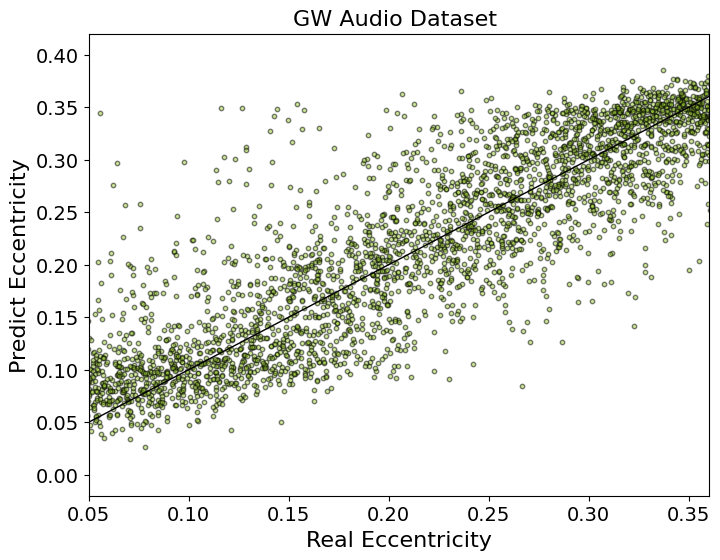

In [8]:

plt.figure(figsize=(8, 6))  # Adjust size as needed
plt.scatter(y_test,y_pred, alpha=0.5, s=10, color='yellowgreen', edgecolor='black')
plt.plot([0, 0.4], [0, 0.4], 'k-', lw=1)  # Diagonal line for reference
plt.title('GW Audio Dataset ', fontsize=16)
plt.xlabel('Real Eccentricity', fontsize=16)
plt.ylabel('Predict Eccentricity', fontsize=16)
plt.xticks(fontsize=14)   
plt.yticks(fontsize=14)  
#plt.legend(loc='upper left')
#plt.grid(True)
plt.xlim(0.05,0.36)
plt.savefig('loss_paper.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
